# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***sklearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [2]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [8]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target)
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [10]:
# we only take the first two features. 
X = iris.data[:, 0:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [11]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
print(f'target names:{str(iris['target_names'])}')
print(type(iris['target_names']))

target names:['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>


In [15]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [18]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y], axis=1)
iris_data.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [23]:
#只選擇目標為0與1的資料
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0, 1])]

print(iris_data.size)
print(iris['data'].size)
iris_data

300
600


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


## 切分訓練集與測試集
> train_test_split()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)', 'sepal width (cm)']], iris_data['target'], test_size=0.2)


In [32]:
print(X_train.shape)
X_train.head()

(80, 2)


,sepal length (cm),sepal width (cm)
87,6.3,2.3
83,6.0,2.7
96,5.7,2.9
30,4.8,3.1
92,5.8,2.6


In [33]:
print(X_test.shape)
X_test.head()

(20, 2)


,sepal length (cm),sepal width (cm)
34,4.9,3.1
97,6.2,2.9
16,5.4,3.9
54,6.5,2.8
9,4.9,3.1


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [ ]:
def norm_stats(dfs):
    minimum = dfs.min()
    maximum = dfs.max()
    mu = dfs.mean()
    sigma = dfs.std()
    return (minimum, maximum, mu, sigma) #tuple can store series, and the below code need to be mu[c] and s[c]


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [53]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train

array([[ 1.21548476, -1.79486097],
       [ 0.75390827, -0.93246531],
       [ 0.29233178, -0.50126748],
       [-1.0923977 , -0.07006965],
       [ 0.44619061, -1.14806423],
       [ 0.75390827, -2.01045989],
       [-0.01538588,  0.79232602],
       [ 0.29233178, -0.28566856],
       [-1.86169185, -0.28566856],
       [-1.70783302, -0.50126748],
       [ 0.13847295, -0.93246531],
       [-1.0923977 ,  0.5767271 ],
       [ 1.67706126, -0.50126748],
       [ 1.3693436 ,  0.14552927],
       [-0.47696238,  0.79232602],
       [-0.78468004, -1.79486097],
       [ 0.13847295, -0.28566856],
       [-0.78468004, -0.28566856],
       [-0.16924471,  1.22352385],
       [-0.63082121,  0.79232602],
       [ 1.67706126, -0.28566856],
       [-0.01538588, -1.14806423],
       [-0.93853887,  1.00792493],
       [ 0.44619061, -0.93246531],
       [-0.16924471, -0.28566856],
       [-0.78468004,  0.79232602],
       [ 0.29233178,  1.43912276],
       [ 0.29233178,  2.73271626],
       [-0.16924471,

## use sklearn

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.51   3.1325]
[0.6458715  0.46091621]


In [56]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:10]

array([[ 1.22315351, -1.80618513],
       [ 0.75866484, -0.93834843],
       [ 0.29417616, -0.50443008],
       [-1.09928987, -0.07051173],
       [ 0.44900572, -1.15530761],
       [ 0.75866484, -2.02314431],
       [-0.01548296,  0.79732497],
       [ 0.29417616, -0.28747091],
       [-1.87343766, -0.28747091],
       [-1.7186081 , -0.50443008]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [57]:
sctest = StandardScaler().fit(X_test)
X_test_std = sctest.transform(X_test) #need to specify sctest separately
print(X_test_std[:10])

[[-0.71247916  0.26360602]
 [ 1.51938327 -0.12692142]
 [ 0.14592947  1.82571575]
 [ 2.03442845 -0.32218513]
 [-0.71247916  0.26360602]
 [-1.05584261  0.45886973]
 [-1.22752434  0.26360602]
 [ 0.48929292  0.0683423 ]
 [-1.22752434  1.2399246 ]
 [ 1.691065   -0.90797628]]


you can also use fit_transform method (i.e., fit and then transform)    

In [61]:
new = StandardScaler()
X_train_std = new.fit_transform(X_train)  # first fit and then transform, then don't need to specify sctest, good function
X_test_std = new.fit_transform(X_test)
print(X_test_std[:10])
print(X_train_std.shape)

[[-0.71247916  0.26360602]
 [ 1.51938327 -0.12692142]
 [ 0.14592947  1.82571575]
 [ 2.03442845 -0.32218513]
 [-0.71247916  0.26360602]
 [-1.05584261  0.45886973]
 [-1.22752434  0.26360602]
 [ 0.48929292  0.0683423 ]
 [-1.22752434  1.2399246 ]
 [ 1.691065   -0.90797628]]
(80, 2)


In [62]:
print('mean of X_train_std:',np.round(X_train_std.mean(axis=0),4))
print('std of X_train_std:',X_train_std.std(axis=0))

mean of X_train_std: [0. 0.]
std of X_train_std: [1. 1.]


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


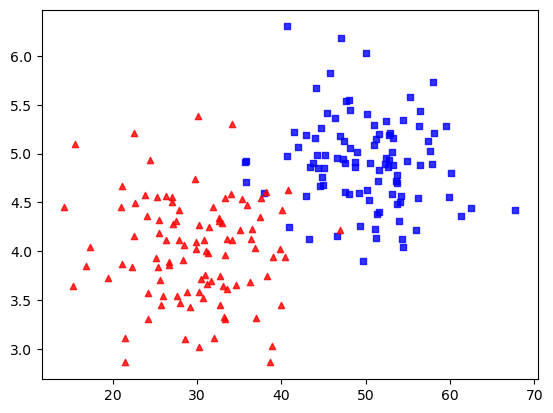

49.997966098227714
29.83579432354325
[47.4144433  50.94749345 45.19745989 46.61155096 48.77129647 44.8390144
 48.14430746 56.30238733 35.76705971 54.87988664 62.44562733 53.60817757
 60.09347557 52.76182918 47.28743403 44.75773112 44.99134767 52.45044052
 52.72447571 53.73410906 37.93307763 43.37809659 57.3434357  51.59162191
 51.21142645 47.06422222 55.96650235 44.16015555 57.86848954 52.90668342
 54.00407266 49.30447658 53.26854448 46.60479421 51.34848722 49.63739964
 54.33387465 54.16257859 50.41486344 50.54938349 53.14686547 40.95965295
 47.56048812 56.40849317 40.71761769 55.27310258 44.25216802 45.0453218
 43.29967509 42.88558703 44.57188436 35.74892395 48.04024936 49.23125284
 52.42052667 42.97963819 50.93185892 50.14328152 48.71754845 45.7751721
 53.25738591 43.79647907 54.07282758 51.58614249 56.44200987 50.11531873
 51.5846305  53.75390762 53.6511452  48.07457127 45.46978581 52.32094353
 67.72677298 42.03482549 47.7111799  41.49117161 59.90190055 52.64550562
 51.27917337 51.4

In [68]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)
plt.show()

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))
print(x1)
print(type(x1))
print(x1.shape)

In [73]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [74]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [75]:
minmax_norm(x_val[:10])

array([0.56718762, 0.73923504, 0.45922813, 0.52808952, 0.63326171,
       0.44177307, 0.6027295 , 1.        , 0.        , 0.9307291 ])

In [76]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) #1D to 2D
'''
The -1 in the reshape operation is a special keyword in NumPy that means "infer this dimension based on the other dimensions." 
When you use reshape(-1, 1), you're telling NumPy to automatically figure out the size of the first dimension based on the length of the original array.

So, for example:
If x1 has a shape of (200,), calling x1.reshape(-1, 1) will automatically reshape it to (200, 1). 
NumPy knows that you want one column, and it figures out the number of rows based on the total size of the original array (which is 200 in this case).
'''
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
[67.72677298]
[[0.6198118 ]
 [0.6859403 ]
 [0.57831626]
 [0.60478397]
 [0.64520817]
 [0.5716072 ]
 [0.63347275]
 [0.78616846]
 [0.40180638]
 [0.75954335]]
